In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import csv

import math
import time
import random


In [2]:
#For training
data_train = []
with open("E:/SEMESTER 6/ML-CS60050/Assgnment/Fourth/My_code/training_data_final.csv") as f1:
    for line in csv.reader(f1):
        data_train.append(line)

num_rows_train = len(data_train)
num_colm_train = len(data_train[:][0])
data_train = np.array(data_train).astype(np.float)

train_y = np.array(data_train[:,num_colm_train -1])
train_x = np.delete(data_train,num_colm_train-1,1) 
num_colm_train = num_colm_train - 1

print(data_train[0:5,:])

[[ 1.37885035  1.23630482  1.467836    1.18429415  1.45269327 -0.5714776
   1.61516251  2.        ]
 [ 1.6062199   1.65078218  0.29700938  1.66844904  1.43942413 -0.49214284
   1.58456955  2.        ]
 [ 0.1765477   0.15405838  0.64062154  0.16394902  0.35666196 -1.55549534
  -0.56305611  1.        ]
 [ 2.07818398  1.91174941  1.36178286  1.85849115  2.05245859  0.87721518
   1.86194571  2.        ]
 [-0.16450663 -0.12993536  0.06793461 -0.13468857 -0.28025696 -1.49082751
  -0.22041498  1.        ]]


In [3]:
# testing data

data_test = []
with open("E:/SEMESTER 6/ML-CS60050/Assgnment/Fourth/My_code/testing_data_final.csv") as f2:
    for line in csv.reader(f2):
        data_test.append(line)
        
num_rows_test = len(data_test)
num_colm_test = len(data_test[:][0])
data_test = np.array(data_test).astype(np.float)


test_y = np.array(data_test[:,num_colm_test -1])
test_x = np.delete(data_test,num_colm_test-1,1) 
num_colm_test = num_colm_test - 1
print(data_test[0:5,:])

[[ 0.01118803  0.00822376  0.42851527 -0.16862466  0.19743223 -1.7881662
  -0.92201349  1.        ]
 [ 1.18937572  1.02139064  1.68842652  0.7928979   1.317348   -0.57547768
   1.12975424  2.        ]
 [ 1.40985528  1.35143742  0.9842337   1.1661949   1.50311602 -0.52814349
   1.10324034  2.        ]
 [-0.16106164 -0.26809448  1.02241283 -0.54870888  0.14170182 -0.82548218
  -0.92201349  1.        ]
 [ 0.24544757  0.25383997  0.47942078  0.33362948  0.39646939  0.84788132
   0.89520823  2.        ]]


In [4]:
# def predict(self, X, Y, weight_1, weight_2):
#         ypred = np.array([np.argmax(self._forward_pass(x_, Y, weight_1, weight_2)) for x_ in X], dtype=np.int)
#         return ypred

def _dotprod(self, a, b): # for dot product
        return sum([a_ * b_ for (a_, b_) in zip(a, b)])
    
    
def _update_weights(x, eta):
        for i, layer in enumerate(self.network):
            # Grab input values
            if i == 0: inputs = x
            else: inputs = [node_['output'] for node_ in self.network[i-1]]
            # Update weights
            for node in layer:
                for j, input in enumerate(inputs):
                    # dw = - learning_rate * (error * transfer') * input
                    node['weights'][j] += - eta * node['delta'] * input    

    

In [5]:
#  Sigmoid (activation function)
# def _sigmoid(self, x):
#     return 1.0/(1.0+math.exp(-x))

#  Sigmoid derivative
# def _sigmoid_derivative(self, sigmoid):
#     return sigmoid*(1.0-sigmoid)

def _backward_pass(X, Y, w1, w2, x_end, x_middle):
    learning_rate = 0.01

    if(Y==1): #intialising Y
        Y = [1,0,0]
    elif(Y==2):
        Y = [0,1,0]
    else: # if Y==3
        Y = [0,0,1]

 
    # def diff_sig(x): # differenciating the sigmoid function
    #     sigmoid_value=1/(1 + np.exp(-x))
    #     return sigmoid_value*(1-sigmoid_value)
    sigmoid1_value=1/(1 + np.exp(-x_end))
    x_end_diff = sigmoid1_value*(1-sigmoid1_value)                 #diff_sig(x_end)
    derivation_cost_function = np.zeros(3)
    for i in range(3):
        derivation_cost_function[i] = x_end[i] - Y[i]

    delta_1 = np.zeros(32)
    
    sigmoid2_value=1/(1 + np.exp(-x_middle)) #sigmoid function value
    x_middle_deri = sigmoid2_value*(1-sigmoid2_value) # Sigmoid derivative
    
    
    for i in range(32):
        delta_1[i] = x_middle_deri[i] * np.dot(w2[i], derivation_cost_function)

    #Now update weights
    for i in range(32):
        for j in range(3):
            w2[i,j] = w2[i,j] - learning_rate * derivation_cost_function[j] * x_middle[i]

    for i in range(7):
        for j in range(32):
            w1[i,j] = w1[i,j] - learning_rate * X[i] * delta_1[j]

    return w1 , w2



In [6]:
def _forward_pass(X, Y, w1, w2): #training part is included in this
    learning_rate = 0.01
    n = len(X)

    for input in range(n):
        x_middle = np.zeros(32)
        for i in range(32):
            #Activation function in the hidden layer : Sigmoid
            sigmoid1_input=np.dot(X[input],w1[:,i]) + 1 #1 for bias
            x_middle[i] = 1/(1 + np.exp(-sigmoid1_input))      

        x_end = np.zeros(3)
        for i in range(3):
            #sigmoid fuction
            sigmoid2_input= np.dot(x_middle,w2[:,i]) + 1 #1 for bias
            x_end[i] = 1/(1 + np.exp(-sigmoid2_input))         

        #Activation function in the output layer : Softmax
        deno = sum(np.exp(val) for val in x_end)
        for i in range(len(x_end)):
            x_end[i] = np.exp(x_end[i]) / deno  #x_end = softmax(x_end) 
        

        #backpropagation will return the updated weights
        w1 , w2 = _backward_pass( X[input], Y[input], w1, w2, x_end, x_middle)

    return w1,w2



In [7]:
def testing(X, Y,weigth_1, weight_2):
    n = len(X)
    count = 0;
    acc = np.zeros(n)
    for input in range(n):
        x_middle = np.zeros(32)
        for i in range(32):
            sigmoid1_input=np.dot(X[input],weight_1[:,i]) + 1
            x_middle[i] = 1/(1 + np.exp(-sigmoid1_input))  #sig(np.dot(X[input],weight_1[:,i]) + 1) #1 for bias

        x_end = np.zeros(3)
        for i in range(3):
            temp2_input= np.dot(x_middle,weight_2[:,i]) + 1
            x_end[i] = 1/(1 + np.exp(-temp2_input))   #sig(np.dot(x_middle,weight_2[:,i]) + 1) #1 for bias

        #Applying Softmax to final layer x_end
        deno = sum(np.exp(val) for val in x_end)
        for i in range(len(x_end)):
            x_end[i] = np.exp(x_end[i]) / deno  #x_end = softmax(x_end) 
        

        if(Y[input]==1):
            y = [1,0,0]
        elif(Y[input]==2):
            y = [0,1,0]
        else:
            y = [0,0,1]

        if(x_end[1] > x_end[2]):
            if(x_end[0] < x_end[1]):
                x = [0,1,0]
            else:
                x = [1,0,0]
        else:
            if(x_end[0] < x_end[2]):
                x = [0,0,1]
            else:
                x = [1,0,0]

        flag = 0
        for i in range(3):
            if(x[i] != y[i]):
                flag = 1;

        if(flag==0):
            count += 1;
    result_f=count * 100 / n
    return result_f



In [8]:
train_acc = []
test_acc = []
# No. of neurons in hidden layer: 32
for batch in range(num_rows_train//32):
    data_batch = np.array(train_x[32*(batch):32*(batch+1),:])
    output_batch = np.array(train_y[32*(batch):32*(batch + 1)])

    #Initialise weight matrix
    weight_1 = np.zeros(shape=(7,32))
    weight_2 = np.zeros(shape=(32,3))
    for i in range(7):
        for j in range(32):
            weight_1[i,j] = random.uniform(-1,1)

    for i in range(32):
        for j in range(3):
            weight_2[i,j] = random.uniform(-1,1)


    for epochs in range(1,201):
        #learning_rate = 0.01

        #Training
        weight_1, weight_2 = _forward_pass(data_batch, output_batch, weight_1, weight_2)

        #Testing
        accuracy_train = testing(data_batch, output_batch, weight_1, weight_2)
        accuracy_test = testing(test_x, test_y, weight_1, weight_2)

        if(epochs%10 == 0):
            train_acc.append(accuracy_train)
            test_acc.append(accuracy_test)

    print("#")



#
#
#
#
#


Final training accuracy:  71.875
Final testing accuracy:  76.19047619047619


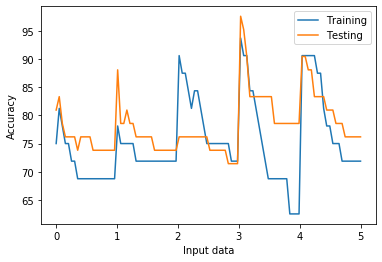

In [9]:
train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
print("Final training accuracy: ",train_acc[-1])
print("Final testing accuracy: ",test_acc[-1])


xaxis = np.linspace(0,5,100)

plt.figure()
plt.plot(xaxis,train_acc,label='Training')
plt.plot(xaxis,test_acc,label='Testing')
plt.xlabel('Input data')
plt.ylabel('Accuracy')
plt.legend()
plt.show()